In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple

In [30]:
def basic(tol: float, ns: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Runs the basic algorithm.
    
    Inputs:
    tol (float) : tolerance
    ns (np.ndarray) : list of numbers to run algorithm
    
    Outputs:
    counts : number of iterations for each number
    a : numerators of each number
    b : denominators of each number
    """
    
    a = np.ones(ns.shape)
    b = np.ones(ns.shape)
    counts = np.ones(ns.shape)
    curr = a / b
    
    while np.any(np.abs(curr - ns) > tol):
        a = np.where((np.abs(curr - ns) > tol) & (curr - ns < tol), a + 1, a)
        b = np.where((np.abs(curr - ns) > tol) & (curr - ns > tol), b + 1, b)
        counts = np.where(np.abs(curr - ns > tol), counts + 1, counts)
        curr = a / b
        
    return counts, a, b

In [63]:
ns = np.linspace(0.0, 2.0, 1001)[1:-1]
basic_counts, basic_a, basic_b = basic(1e-5, ns)

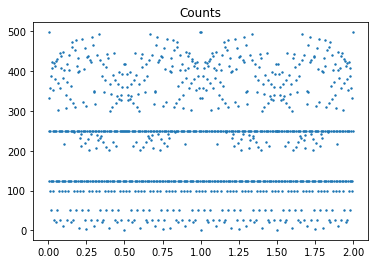

In [64]:
fig, ax = plt.subplots()
plt.title("Counts")
plt.scatter(ns, basic_counts, s=2)

In [70]:
def monotone_numerator(tol: float, ns: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Runs the monotone numerator algorithm.
    
    Inputs:
    tol (float) : tolerance
    ns (np.ndarray) : list of numbers to run algorithm
    
    Outputs:
    counts : number of iterations for each number
    a : numerators of each number
    b : denominators of each number
    """
    
    a = np.ones(ns.shape)
    b = np.ones(ns.shape)
    counts = np.ones(ns.shape)
    curr = a / b
    
    while np.any(np.abs(curr - ns) > tol):
        a = np.where((np.abs(curr - ns) > tol) & (curr - ns < tol), a + 1, a)
        b = np.where((np.abs(curr - ns) > tol) & (curr - ns > tol), b + 1, b - 1)
        counts = np.where(np.abs(curr - ns > tol), counts + 1, counts)
        curr = a / b
        
    return counts, a, b

In [71]:
ns = np.linspace(0.0, 1.0, 1001)[1:-1]
numerator_counts, numerator_a, numerator_b = monotone_numerator(1e-5, ns)

C:\Users\cubos\AppData\Local\Temp\ipykernel_12780\571509393.py:24: RuntimeWarning: divide by zero encountered in true_divide
  curr = a / b


KeyboardInterrupt: 

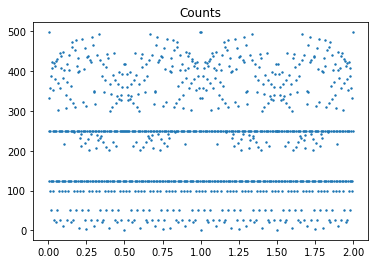

In [57]:
fig, ax = plt.subplots()
plt.title("Counts")
plt.scatter(ns, counts, s=2)

In [58]:
def monotone_denominator(tol: float, ns: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Runs the monotone denominator algorithm.
    
    Inputs:
    tol (float) : tolerance
    ns (np.ndarray) : list of numbers to run algorithm
    
    Outputs:
    counts : number of iterations for each number
    a : numerators of each number
    b : denominators of each number
    """
    
    a = np.ones(ns.shape)
    b = np.ones(ns.shape)
    counts = np.ones(ns.shape)
    curr = a / b
    
    while np.any(np.abs(curr - ns) > tol):
        a = np.where((np.abs(curr - ns) > tol) & (curr - ns < tol), a + 1, a - 1)
        b = np.where((np.abs(curr - ns) > tol) & (curr - ns > tol), b + 1, b)
        counts = np.where(np.abs(curr - ns > tol), counts + 1, counts)
        curr = a / b
        
    return counts, a, b

In [59]:
ns = np.linspace(0.0, 2.0, 1001)[1:-1]
counts, a, b = basic(1e-5, ns)

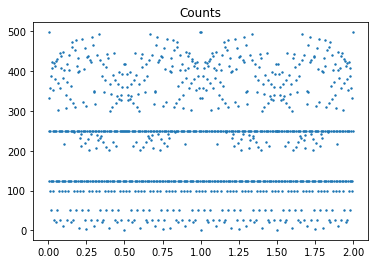

In [60]:
fig, ax = plt.subplots()
plt.title("Counts")
plt.scatter(ns, counts, s=2)